# Analyse exploratoire des données nettoyées

L'analyse et la validation du concept seront faits sur le jeu de données des produits dont le nutriscore est connu, l'autre jeu sera éventuellement utilisé pour un essai de prédition en fonction des la validation du concept d'application.

In [1]:
import pandas as pd
df=pd.read_csv('../Données/Food_data_train.csv',index_col='Unnamed: 0')

In [2]:
df.head(5)

,nutriscore_score,product_name,energy_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts-estimate_100g
3,18.0,moutarde au moût de raisin,936.0,2.2,22.00,4.600,5.1,0.0,0.0
21,14.0,Tarte noix de coco,1594.0,15.5,21.90,0.100,4.6,4.4,0.0
31,-2.0,Compote de poire,657.0,0.0,27.00,0.000,0.6,3.6,0.0
66,-4.0,BAguette bressan,669.0,0.5,0.60,0.358,9.5,1.6,0.0
271,3.0,Cranberries,1255.0,0.0,66.67,0.000,0.0,10.0,0.0


****************************************************************

# Exploration des données

*******************************************************

## Etude des distributions des variables

In [101]:
#fonction permettant de tracer des boxplots simples couplés avec un histogramme de la distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def Distribution(Sx,titre='',unit_text='',fliers=True,tab=10):
    # série à traiter, titre de la figure, xlabel, unité abscisses, legende unité , tab= espacement des affichages text
    # fliers True/False
        
    f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,5),sharex=True, gridspec_kw={'height_ratios': [5, 1],'hspace':.3})
    f.suptitle(titre,y=1,fontsize=20)
    # Boxplot 
    ax2=Sx.plot(kind='box',vert=False,showmeans=True,showfliers=fliers,
               color=dict(boxes='k', whiskers='k', medians='orange', caps='k'),meanprops={'marker':"d"})
    xmin, xmax, ymin, ymax = ax2.axis()
    
    # Formatage des unités abscisses
    ax2.tick_params(labelsize=14)
    # Affichage unités abscisses
    ax2.set_xlabel(unit_text,x=1, ha='right',fontsize=14) 
    # Formatage des valeurs du bandeau moyenne, ecart type,....
    def form (x): return str('{:.1f}'.format(x)).ljust(tab)
    # Ajout des indicateurs statistiques
    if fliers:
        ax2.set_title('Min= '+form(Sx.min())+
                  'Médiane= '+form(Sx.median())+
                  'Moyenne= '+form(Sx.mean())+
                  '\u03C3= '+form(Sx.std())+
                  'Max= '+form(Sx.max()),
                  fontsize=14)
    # Histogramme
    ax1.set_title(' skewness : '+str(Sx.skew())+'              kurtosis : '+str(Sx.kurtosis())) 
    ax1.tick_params(labelsize=14)
    ax1.set_xlim(xmin,xmax)
    sns.histplot(data=Sx,stat='count',bins='auto',discrete=False,kde=True,ax=ax1) 
    plt.show()


Statistiques descriptives des variables

In [4]:
df.describe()

,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts-estimate_100g
count,364392.000000,364392.000000,364392.000000,364392.000000,364392.000000,364392.000000,364392.000000,364392.000000
mean,8.243751,1163.071187,4.603189,13.840661,1.093445,7.931899,2.850998,0.260250
std,9.078811,757.311787,6.923045,18.324126,3.351919,8.242317,4.377247,3.610797
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,444.000000,0.000000,1.300000,0.100000,2.200000,0.000000,0.000000
50%,9.000000,1167.000000,1.700000,4.800000,0.610000,5.900000,1.600000,0.000000
75%,15.000000,1711.000000,6.670000,21.210000,1.270000,10.910000,3.600000,0.000000
max,36.000000,3700.000000,100.000000,100.000000,100.000000,94.000000,100.000000,95.000000


### Variable cible : nutriscore_score

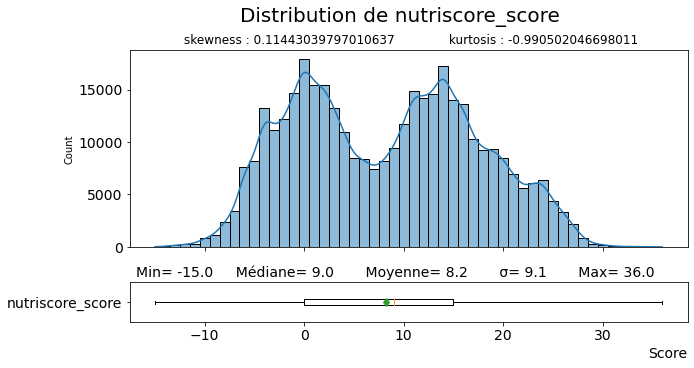

In [98]:
cible='nutriscore_score'
Distribution(df[cible],'Distribution de '+cible,'Score')

 Les deux pics de la distribution coorespondent-ils à un manque de données?
 
 TEST: H0 la distribution de la variable suit une Loi Normale.
 
 Si la p-value est inferieure à 0.05 on rejette H0, ie la variable ne suit pas une Loi Normale.

In [74]:
import pingouin as pg
pg.normality(data=df['nutriscore_score'],method='normaltest')

,W,pval,normal
nutriscore_score,80424.676077,0.0,False


conclusion: Ho rejetée, nutriscore_score ne suit pas une Loi Normale.

Il ne s'agit pas d'une distribution normale incomplète

## Variables explicatives :



  **************************************************
    Variable energy_100g

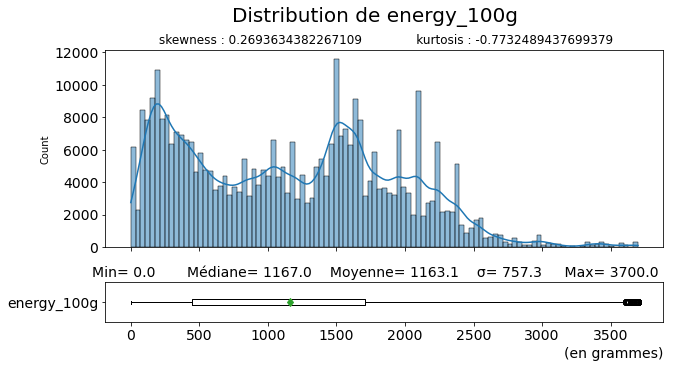

In [102]:
var1='energy_100g'
Distribution(df[var1],'Distribution de '+var1,'(en grammes)')

Distribution sans les outliers

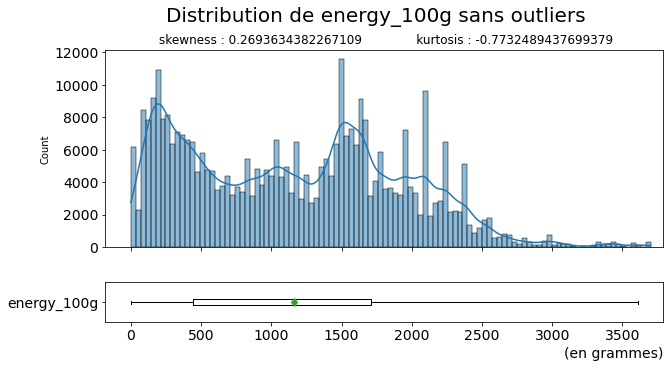

In [103]:
Distribution(df[var1],'Distribution de '+var1+' sans outliers','(en grammes)',fliers=False)

In [77]:
pg.normality(data=df[var1],method='normaltest')

,W,pval,normal
energy_100g,31555.561339,0.0,False


*************************************************
    Variable saturated-fat_100g

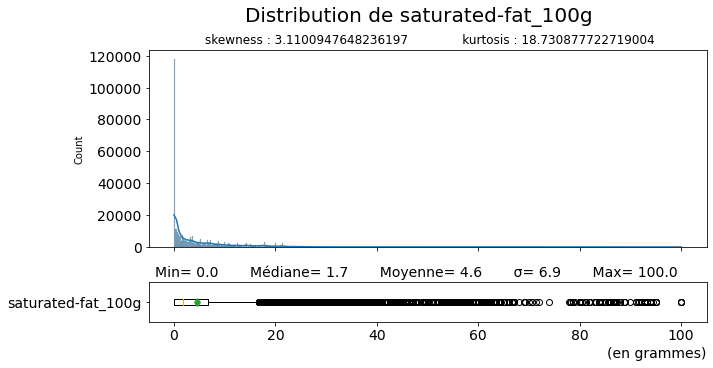

In [104]:
var2='saturated-fat_100g'
Distribution(df[var2],'Distribution de '+var2,'(en grammes)')

Distribution sans les outliers

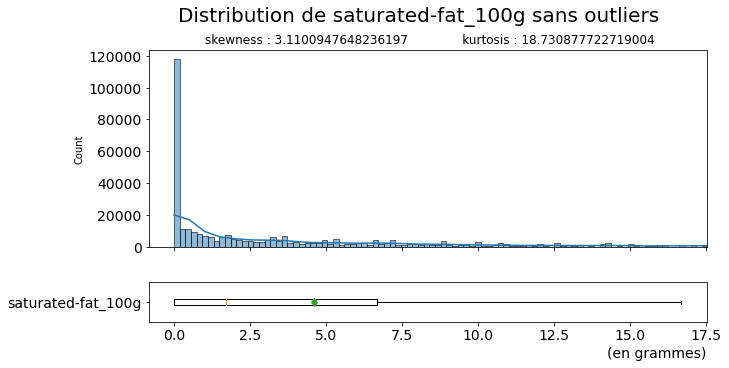

In [105]:
Distribution(df[var2],'Distribution de '+var2+' sans outliers','(en grammes)',fliers=False)

In [80]:
pg.normality(data=df[var2],method='normaltest')

,W,pval,normal
saturated-fat_100g,255726.751045,0.0,False


***************************************
    Variable sugars_100g

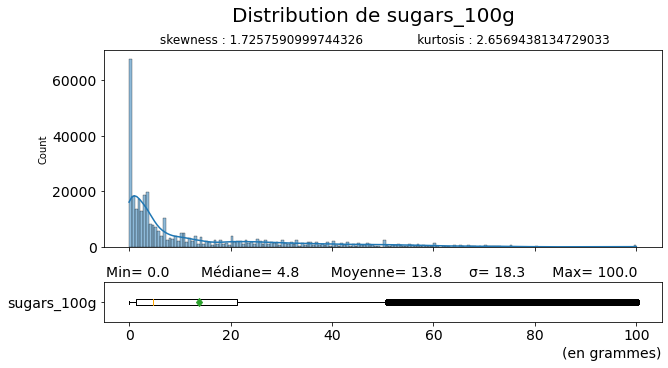

In [106]:
var3='sugars_100g'
Distribution(df[var3],'Distribution de '+var3,'(en grammes)')

Distribution sans les outliers

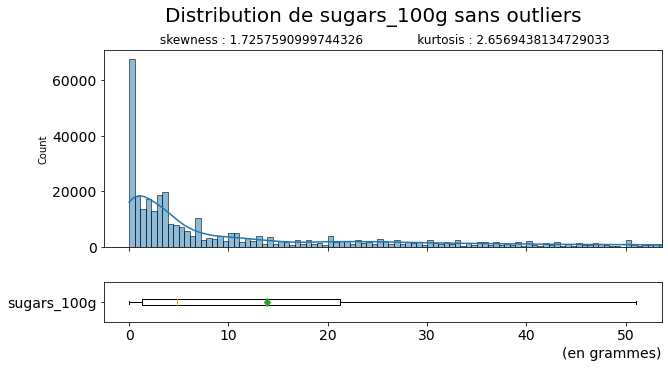

In [107]:
Distribution(df[var3],'Distribution de '+var3+' sans outliers','(en grammes)',fliers=False)

In [83]:
pg.normality(data=df[var3],method='normaltest')

,W,pval,normal
sugars_100g,113056.343753,0.0,False


******************************
    Variable salt_100g

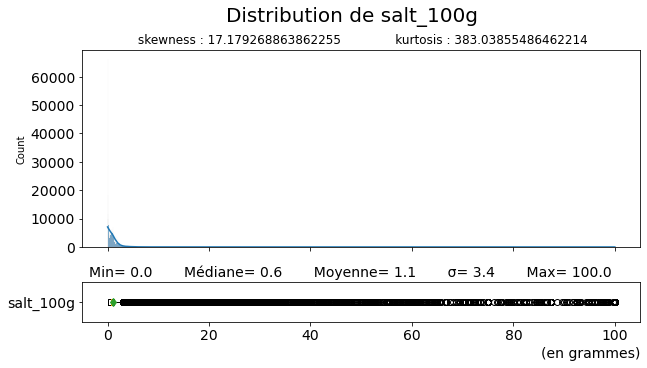

In [108]:
var4='salt_100g'
Distribution(df[var4],'Distribution de '+var4,'(en grammes)')

Distribution sans les outliers

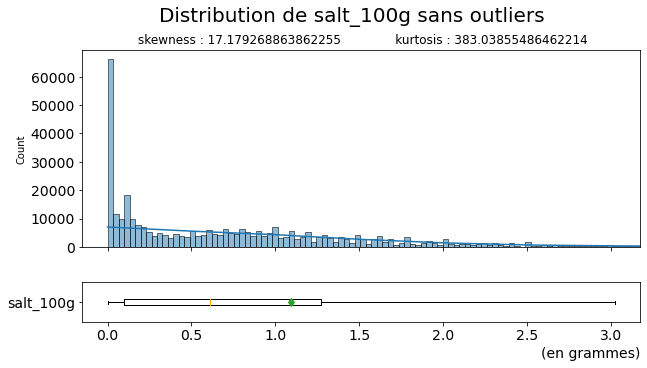

In [109]:
Distribution(df[var4],'Distribution de '+var4+' sans outliers','(en grammes)',fliers=False)

In [86]:
pg.normality(data=df[var4],method='normaltest')

,W,pval,normal
salt_100g,741406.659383,0.0,False


********************************************
    Variable proteins_100g

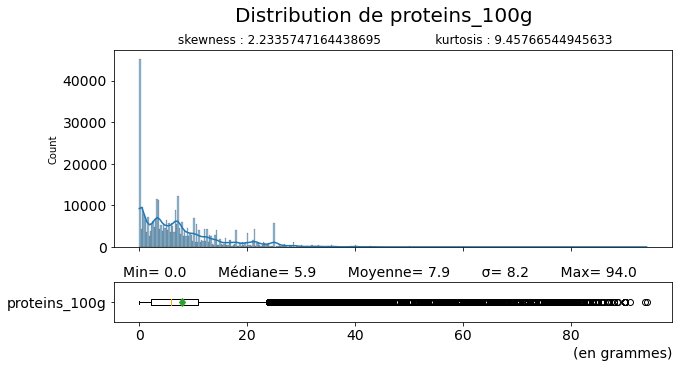

In [110]:
var5='proteins_100g'
Distribution(df[var5],'Distribution de '+var5,'(en grammes)')

Distribution sans les outliers

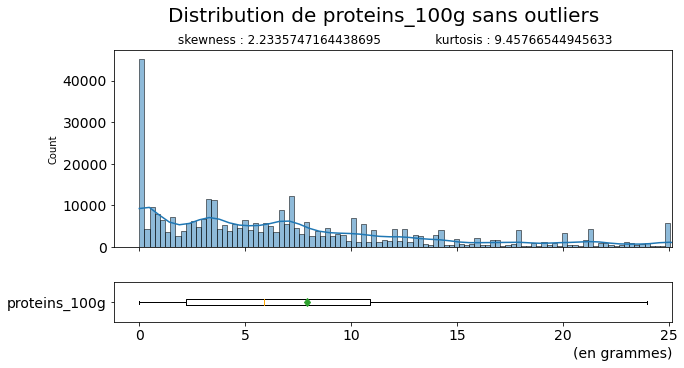

In [111]:
Distribution(df[var5],'Distribution de '+var5+' sans outliers','(en grammes)',fliers=False)

In [112]:
pg.normality(data=df[var5],method='normaltest')

,W,pval,normal
proteins_100g,182584.110008,0.0,False


****************************
    Variable fiber_100g

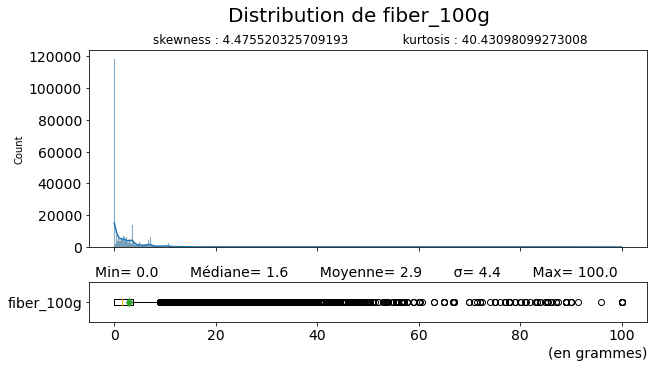

In [113]:
var6='fiber_100g'
Distribution(df[var6],'Distribution de '+var6,'(en grammes)')

Distribution sans les outliers

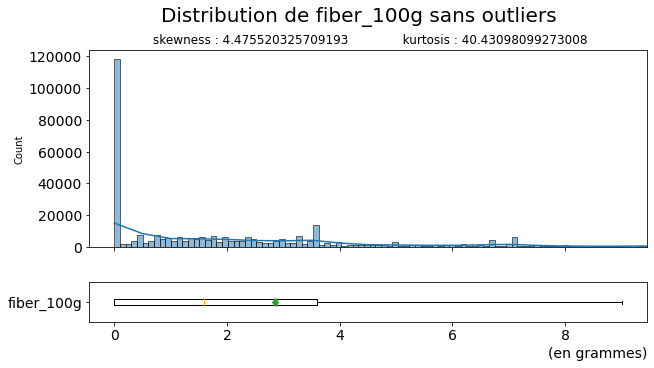

In [114]:
Distribution(df[var6],'Distribution de '+var6+' sans outliers','(en grammes)',fliers=False)

In [92]:
pg.normality(data=df[var6],method='normaltest')

,W,pval,normal
fiber_100g,347026.788474,0.0,False


**********************************************
    Variable fruits-vegetables-nuts-estimate_100g

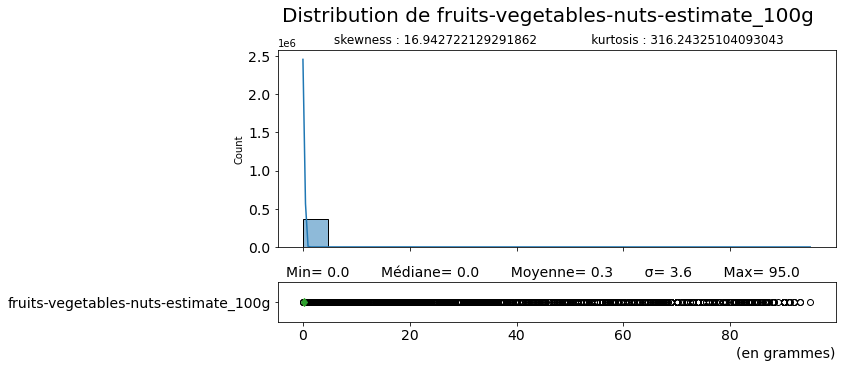

In [115]:
var7='fruits-vegetables-nuts-estimate_100g'
Distribution(df[var7],'Distribution de '+var7,'(en grammes)')

Distribution sans les outliers

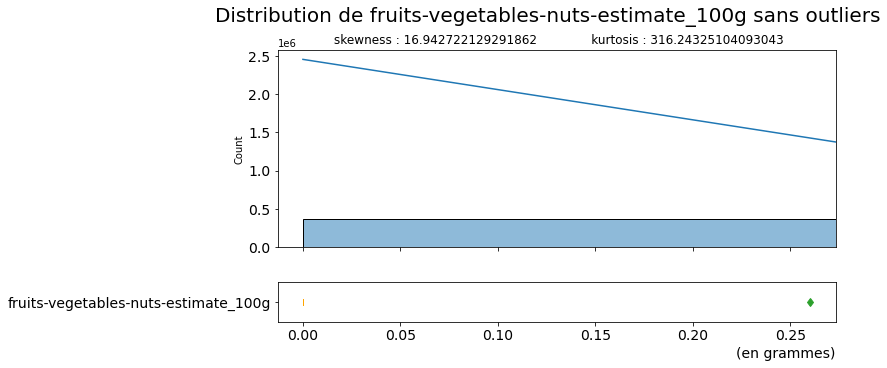

In [116]:
Distribution(df[var7],'Distribution de '+var7+' sans outliers','(en grammes)',fliers=False)

In [27]:
pg.normality(data=df[var7],method='normaltest')

,W,pval,normal
fruits-vegetables-nuts-estimate_100g,733142.205933,0.0,False


*********************************************

A ce stade, on constate que:

- aucune des variables n'est distribuée normalement.
- certaines variables ont un nombre non négligeable d'outliers. En fonction des conclusions quand à la validité du concept, il faudra définir une stratégie de gestion de ces valeurs. Pour l'instant toutes les valeurs sont gardées.

******************************************** 

## Corrélations

## Etude des relations entre les variables explicatives

	energy_100g	saturated-fat_100g	sugars_100g	salt_100g	proteins_100g	fiber_100g   fruits-vegetables-nuts-estimate_100g

<AxesSubplot:>

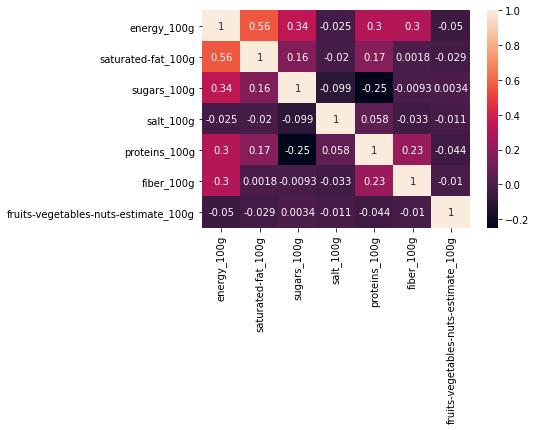

In [28]:
sns.heatmap(df.iloc[:,2:].corr(method='pearson'),annot=True)

Les corrélations observées entre energy_100g et les autres variables sont logiques car les valeurs énergétiques des différents nutriments sont utilisées pour son calcul:


|    variable                  |           Valeur energétique                   |
|------------------------------|--------------------------------------------------|
| saturated-fat_100g      |       37kJ/g                                |
| proteins_100g      |           17kJ/g                                |
| fiber_100g      |              8kJ/g                                |
| sugars_100g      |            17 kJ/g                                 |
| fruits-vegetables-nuts-estimate_100g      |        max 8 kJ/g      |
| salt_100g	      |            0 kJ/g          |          

### Etude de la relation entre le nutriscore et les variables explicatives



#### Relation entre nutriscore_score et saturated-fat_100g

In [29]:
# fonction calculant le R² entre les colonnes col1 et col2 du DataFrame df
def corrélation(table,col1,col2):
    print( 'Coefficient de corrélation entre ',col1,' et ',col2,' : R² = ',table[col1].corr(table[col2],method='pearson'))

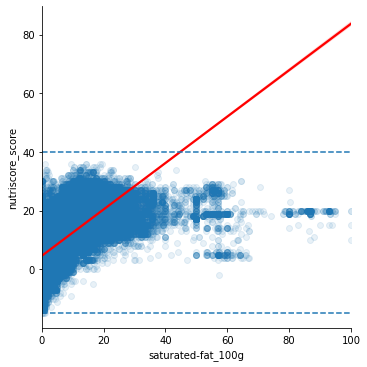

In [30]:
sns.lmplot(data=df,x="saturated-fat_100g", y="nutriscore_score", line_kws = {'color': 'red'},scatter_kws={'alpha':0.1})
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.show()

In [31]:
corrélation(df,'saturated-fat_100g','nutriscore_score')

Coefficient de corrélation entre  saturated-fat_100g  et  nutriscore_score  : R² =  0.602981826464946


<u>Observations:</u>
- Les deux variables sont liées.
- Le coefficient directeur de la droite de régression risque d'ammener à prédire des valeurs du nutriscore bien au delà de 40. 

#### Etude de la relation entre nutriscore_score et energy_100g

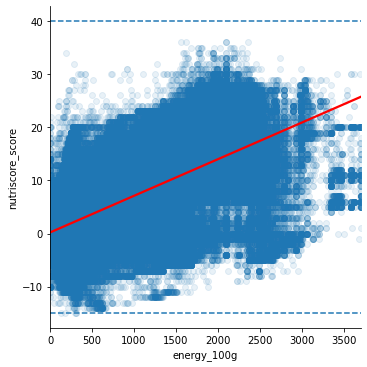

In [32]:
sns.lmplot(data=df,x='energy_100g', y='nutriscore_score',scatter_kws={'alpha':0.1},line_kws = {'color': 'red'})
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.show()

In [33]:
corrélation(df,'energy_100g','nutriscore_score')

Coefficient de corrélation entre  energy_100g  et  nutriscore_score  : R² =  0.5747361151134504


<u>Observation:</u>

- Les deux variables sont liées

#### Etude de la relation entre nutriscore_score et sugars_100g

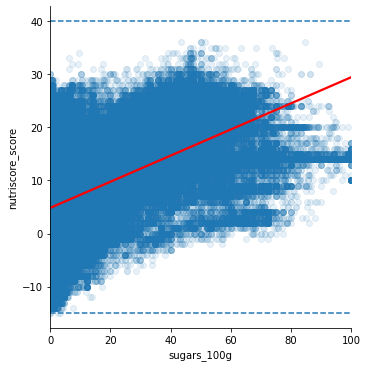

In [34]:
sns.lmplot(data=df,x='sugars_100g', y='nutriscore_score',scatter_kws={'alpha':0.1},line_kws = {'color': 'red'} )
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.show()

In [35]:
corrélation(df,'sugars_100g','nutriscore_score')

Coefficient de corrélation entre  sugars_100g  et  nutriscore_score  : R² =  0.4959960691638468


<u>Observation:</u>
- Les deux variables sont liées


#### Etude de la relation entre nutriscore_score et salt_100g

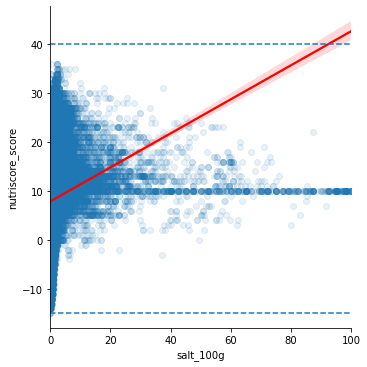

In [36]:
sns.lmplot(data=df,x='salt_100g', y='nutriscore_score',scatter_kws={'alpha':0.1},line_kws = {'color': 'red'} )
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.show()

In [37]:
corrélation(df,'salt_100g','nutriscore_score')

Coefficient de corrélation entre  salt_100g  et  nutriscore_score  : R² =  0.1284017702891522


<u>Observations:</u>
- Les deux variables sont faiblement liées
- Le coefficient directeur de la droite de régression risque d'ammener à prédire des valeurs du nutriscore légérement au delà de 40.

#### Etude de la relation entre nutriscore_score et proteins_100g

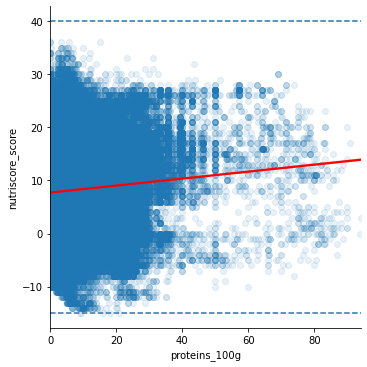

In [38]:
sns.lmplot(data=df,x='proteins_100g', y='nutriscore_score',scatter_kws={'alpha':0.1},line_kws = {'color': 'red'} )
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.show()

In [39]:
corrélation(df,'proteins_100g','nutriscore_score')

Coefficient de corrélation entre  proteins_100g  et  nutriscore_score  : R² =  0.0596775695193289


<u>Observation:</u>
- Les deux variables sont trés faiblement liées


#### Etude de la relation entre nutriscore_score et fiber_100g

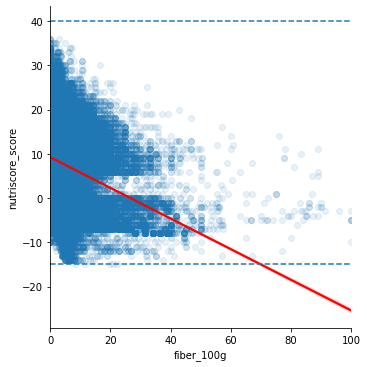

In [40]:
sns.lmplot(data=df,x='fiber_100g', y='nutriscore_score',scatter_kws={'alpha':0.1},line_kws = {'color': 'red'} )
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.show()

In [41]:
corrélation(df,'fiber_100g','nutriscore_score')

Coefficient de corrélation entre  fiber_100g  et  nutriscore_score  : R² =  -0.16683601683668767


<u>Observations:</u>
- Les deux variables sont faiblement liées négativement, ce qui semble logique étant donné que les teneurs en fibre sont prise en compte pour établir la composante négative du nutriscore
- Le coefficient directeur de la droite de régression risque d'ammener à prédire des valeurs du nutriscore en deçà de -15.

#### Etude de la relation entre nutriscore_score et fruits-vegetables-nuts-estimate_100g

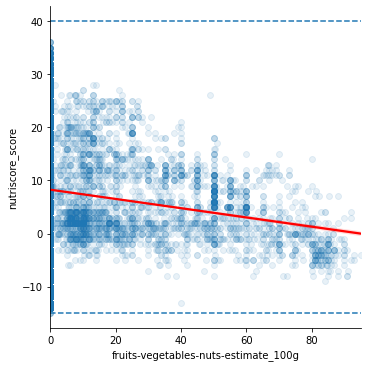

In [42]:
sns.lmplot(data=df,x='fruits-vegetables-nuts-estimate_100g', y='nutriscore_score',scatter_kws={'alpha':0.1},line_kws = {'color': 'red'} )
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.show()

In [43]:
corrélation(df,'fruits-vegetables-nuts-estimate_100g','nutriscore_score')

Coefficient de corrélation entre  fruits-vegetables-nuts-estimate_100g  et  nutriscore_score  : R² =  -0.03458731040196187


<u>Observations:</u>
- trés faible corrélation négative
- Les deux variables sont trés faiblement liées négativement, ce qui semble logique étant donné que les teneurs en fibre sont prise en compte pour établir la composante négative du nutriscore


## A ce stade n'ayant retenu aucune variable qualitative pour tenter de prédire le nutriscore, une ANOVA n'est pas pertinente.
Si toutefois le concept d'aplication n'est pas validé, et qu'a ce titre je sois obligé de catégoriser les différents types de produits, elle deviendrai bien évidement nécessaire.


## Analyse descriptive


Bloc de traçage des résultats de l'Analyse en Composantes Principales tiré du cours

In [44]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(9.3,9.6))
            ax.axis('square')
            
            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 3 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 5 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="red")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.5, color='red'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(6,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2],
                                color=theta,alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='10', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

Séparation du jeu de données en Train et Test afin de pouvoir valider les modélisations


In [45]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split( df,test_size=.2,random_state =42)

Centrage et réduction de toutes les variables explicatives

In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# Centrage reduction et normage de Train

X=Train.iloc[:,2:].values
colonnes=Train.iloc[:,2:].columns
# centrage et réduction
Scaler= StandardScaler(with_mean=True, with_std=False)
X_scaled=Scaler.fit_transform(X)
# normage
Minmax= MinMaxScaler(feature_range=(0, 1))
X_scaled_normed=Minmax.fit_transform(X_scaled)
# création de la table contenant les valeurs transformèes
score=Train.iloc[:,:2]
new=pd.DataFrame(data=X_scaled_normed,columns=colonnes)
# Alignement des index avant concaténation des data frames
new.index=Train.index

# Affectation des valeurs transformées à la table Train_trans
Train_trans=pd.concat([score,new],axis=1)


In [47]:
Train_trans.describe()

,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts-estimate_100g
count,291513.000000,291513.000000,291513.000000,291513.000000,291513.000000,291513.000000,291513.000000,291513.000000
mean,8.235677,0.314098,0.046047,0.138174,0.010948,0.084317,0.028516,0.002844
std,9.076208,0.204690,0.069360,0.183231,0.033542,0.087623,0.043810,0.039137
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.120000,0.000000,0.013000,0.001000,0.023404,0.000000,0.000000
50%,9.000000,0.314324,0.017000,0.048000,0.006100,0.062766,0.016000,0.000000
75%,15.000000,0.462432,0.066700,0.211800,0.012700,0.116064,0.036000,0.000000
max,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Selection des Variables à analyser en composantes principales

In [48]:
# liste des noms des colonnes contenant les variables explicatives:  de energy_100g jusqu'a la fin de la table
X=Train_trans.iloc[:,2:].values
variables = Train_trans.iloc[:,2:].columns

### Analyse en composantes principales

In [49]:
from sklearn.decomposition import PCA
# choix du nombre de composantes à calculer
n_comp = X.shape[1]
# Calcul des composantes principales
pca = PCA(n_components=n_comp,whiten=False,random_state=42).fit(X)

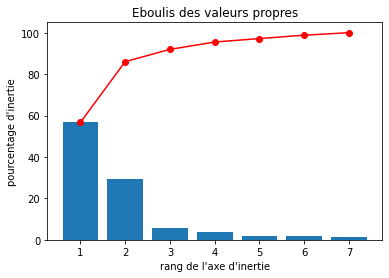

In [50]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [51]:
pca.explained_variance_ratio_*100

array([56.71077585, 29.32613883,  5.9146825 ,  3.55475453,  1.67338505,
        1.62927985,  1.19098338])

Cumul

In [52]:
pca.explained_variance_ratio_.cumsum()*100

array([ 56.71077585,  86.03691468,  91.95159718,  95.50635172,
        97.17973677,  98.80901662, 100.        ])

Plus de 90% de la variance expliquée sur les 3 premiers axes principaux

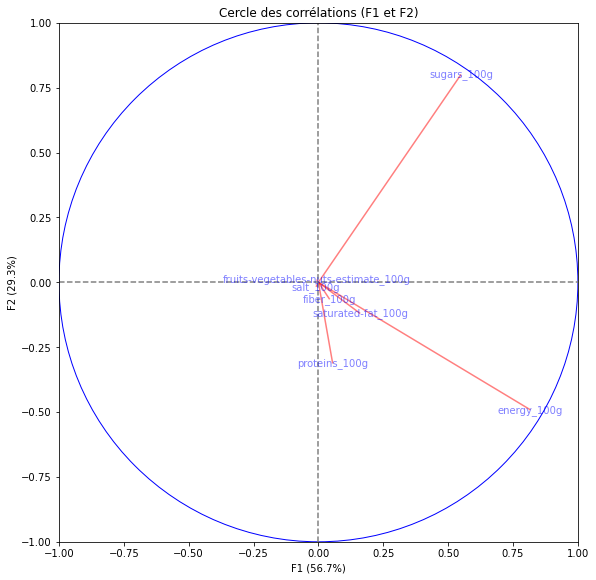

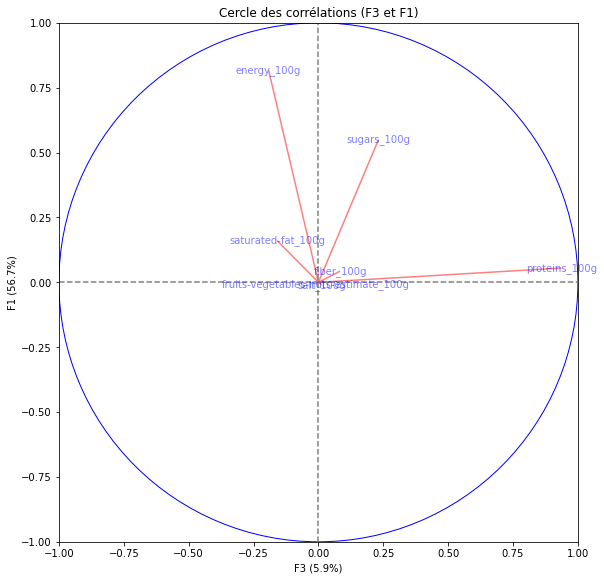

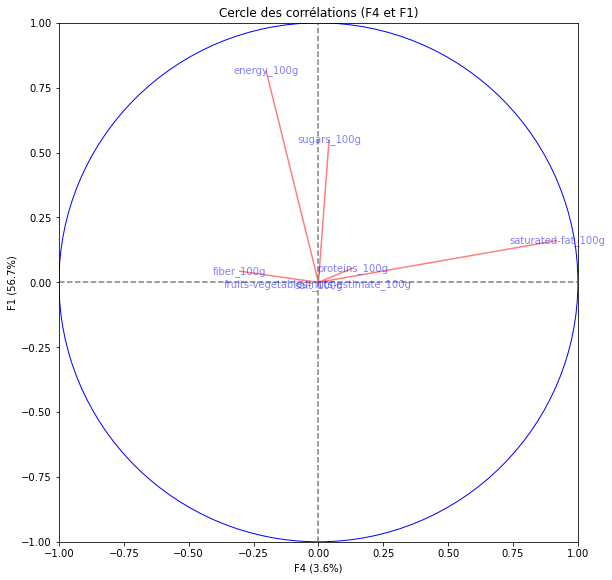

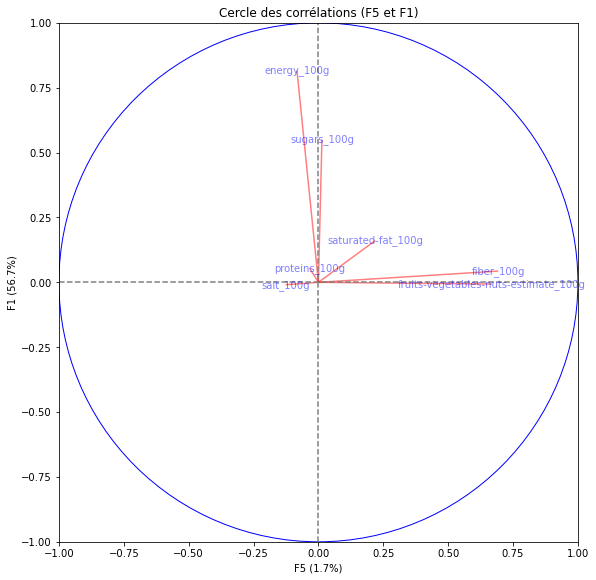

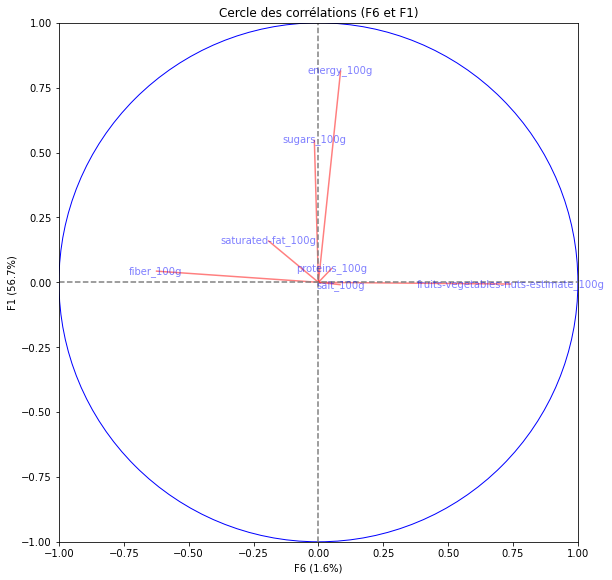

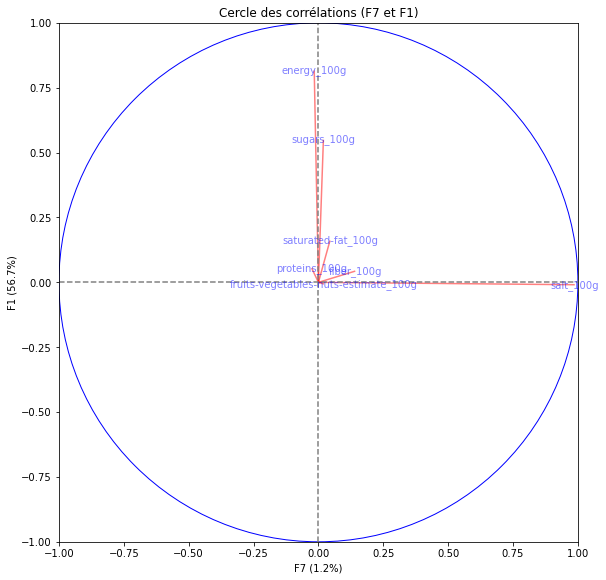

In [53]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca,
                [(0,1),(2,0),(3,0),(4,0),(5,0),(6,0)], labels = np.array(variables), lims=(-1, 1, -1, 1))

Influence des variables pour les axes principaux

In [54]:
# Affichage 
res=pd.DataFrame({'Variable': variables})
for i in range(0,7):
    res['F'+str(i+1)]=pca.components_[i]
res

,Variable,F1,F2,F3,F4,F5,F6,F7
0,energy_100g,0.816608,-0.491131,-0.191733,-0.201818,-0.082804,0.085618,-0.016178
1,saturated-fat_100g,0.161108,-0.120157,-0.159597,0.919956,0.219328,-0.194222,0.044609
2,sugars_100g,0.549694,0.801133,0.231385,0.041041,0.013515,-0.015720,0.019211
3,salt_100g,-0.009224,-0.017276,0.012593,0.001949,-0.126378,0.086123,0.987960
4,proteins_100g,0.055010,-0.312769,0.936464,0.132525,-0.034382,0.052503,-0.026129
5,fiber_100g,0.043318,-0.065533,0.083427,-0.306089,0.693011,-0.626681,0.142077
6,fruits-vegetables-nuts-estimate_100g,-0.006638,0.010968,-0.011999,-0.003158,0.668909,0.742831,0.021100


<u> Composantes de l'aliment expliquées par les différents axes principaux </u>

- F1 : explique majoritairement la composante energétique  

- F2 : explique majoritairement la composante sucrée

- F3 : explique majoritairement la composante protéinique

- F4 : explique majoritairement la composante Acides Gras Saturés

- F5 : explique majoritairement la composante fibres 

- F6 : explique majoritairement la composante fruit, légumes et noix

- F7 : explique majoritairement la composante salée


## Projection des variables sur les 3 premiers axes

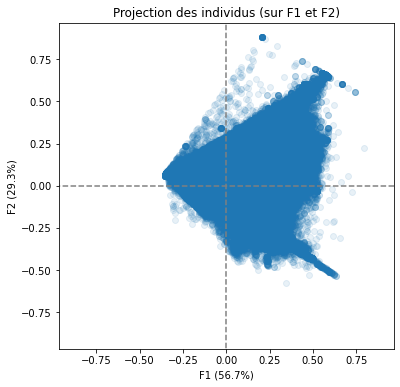

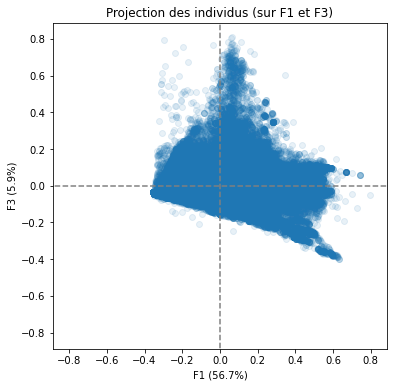

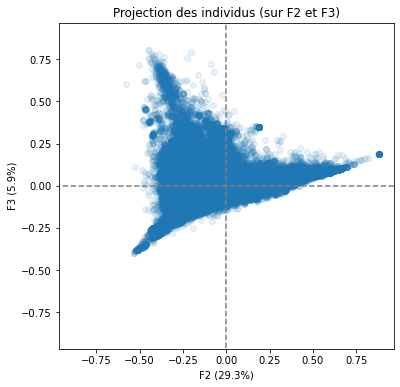

In [55]:
# Projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca,
                         [(0,1),(0,2),(1,2)], alpha=0.1)

plt.show()

### Enregistrement des projections des variables sur les 7 principaux axes de L' ACP

In [56]:
Train_proj=Train_trans[['nutriscore_score','product_name']]
projected=pd.DataFrame(data=X_projected,columns=['F_'+str(i) for i in range(0, X_projected.shape[1])])
projected.index=Train_proj.index

Train_proj=pd.concat([Train_proj,projected],axis=1)

**********************************************************
# Modélisation

## Régression linéaire méthode des moindres carrés
**************************************************
## Essai avec les variables projetées sur les 3 premier axes pricipaux, expliquant 92% de la variance

In [57]:
# Affectation de la variable cible à y
y=Train_proj['nutriscore_score'].values

# Affectaion des variables explicatives à X1
X1=Train_proj[['F_0','F_1','F_2']].values

Création du modèle

In [58]:
import statsmodels.api as sm

# ajout constante pour ordonnée à l'origine
X1_c = sm.add_constant(X1)

# Création du modèle
model1 = sm.OLS(y, X1_c).fit()

# Affichage des paramètres de la régression
print(model1.summary(),'\n')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 7.921e+04
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:20:19   Log-Likelihood:            -9.6972e+05
No. Observations:              291513   AIC:                         1.939e+06
Df Residuals:                  291509   BIC:                         1.939e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2357      0.012    660.054      0.0

Affichage des distributions des prédictions et des valeurs réelles du nutriscore 

In [59]:
def dist_sorties_modèle(true=None,predict=None,model=''):
    sns.kdeplot(y,color='green',label='Réelles')
    sns.kdeplot(predict,color='red',label='Prédites')
    plt.title(model)
    plt.legend(['Réelles','Prédites'])
    plt.xlabel('Valeurs du nutriscore')
    plt.show()

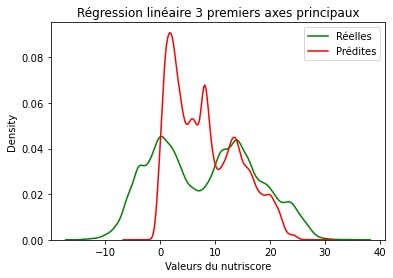

In [60]:
dist_sorties_modèle(y , model1.predict(), 'Régression linéaire 3 premiers axes principaux')

### Observations:

 - le R² est de 44,9% ce qui n'est pas un résultat probant
 - différences flagrantes entre les distributions du nutriscore réel et des prédictions.
 - les p-values des estimateurs sont toutes proches de zéro, ce qui indique que les 3 premières features sont pertinentes mais pas suffisantes pour expliquer les variations de nutriscore_score.
 

******************************************************************** 
## Essai avec les variables projetées sur les 7 axes principaux

In [61]:
# Affectaion des variables explicatives à X2
X2=Train_proj.iloc[:,2:].values

Construction du modèle

In [62]:
# ajout constante pour ordonnée à l'origine
X2_c = sm.add_constant(X2)

# Création du modèle
model2 = sm.OLS(y, X2_c).fit()

# Affichage des paramètres de la régression
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 7.639e+04
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:20:22   Log-Likelihood:            -9.0476e+05
No. Observations:              291513   AIC:                         1.810e+06
Df Residuals:                  291505   BIC:                         1.810e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2357      0.010    824.804      0.0

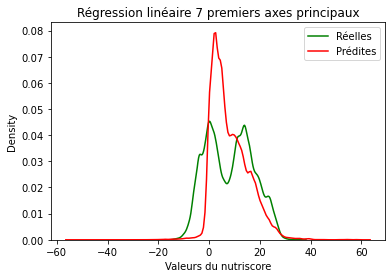

In [63]:
dist_sorties_modèle(y , model2.predict(), 'Régression linéaire 7 premiers axes principaux')

### Observations:

Meilleur résultat mais pas assez probant pour pouvoir valider le concept d'application :

- nutriscores prédits largement au delà de [-15;40]
- toutes les p-values sont proche de zéro donc tous les estimateur sont pertinents, mais pas suffisants pour expliquer la variance de nutriscore_score

**********************************************************

# Construction d'un modèle de regression Random Forest (modèle supervisé)

Application des transformations et décomposition en composantes principales au jeu de train et ensuite sur le jeu de test.

In [64]:
# Affectation des variables X et y
y_test=Test['nutriscore_score'].values
X_t=Test.iloc[:,2:].values
#scale
X_t_sc=Scaler.transform(X_t)
#red
X_t_sc_mm=Minmax.transform(X_t_sc)
# Projection sur les axes principaux
X_t_sc_mm_proj=pca.transform(X_t_sc_mm)
# Affectation à X_test
X_test=X_t_sc_mm_proj

# X1_test on ne prend que les 3 premiers axes principaux de l'ACP
X1_test=X_test[:,:3]
# X2_test on prend les 7 premiers axes principaux de l'ACP
X2_test=X_test

#### Random Forest Regressor

Construction du modèle

In [65]:
from sklearn.ensemble import RandomForestRegressor  

# définition des paramatres du regressor random forest
model3=RandomForestRegressor(n_jobs=-1,random_state=42)
    
# fit
model3.fit(X1, y)

# Importance des variables
print('Importance de Gini (Mean Decrease in Impurity) des estimateurs : ')
print(model3.feature_importances_)   

# Métriques pour évaluer la qualité du modèle    
# score
score_train=model3.score(X1, y)
print ('\n\nTrain : R²= ',score_train)
score_test=model3.score(X1_test, y_test)
print ('\nTest  : R²= ',score_test,'\n')
# racine de la moyenne des carrés des résidus
print('RMSE= ', np.sqrt( np.mean((model3.predict(X1_test) - y_test) ** 2)))

Importance de Gini (Mean Decrease in Impurity) des estimateurs : 
[0.60928093 0.20080614 0.18991293]


Train : R²=  0.9692268220411073

Test  : R²=  0.7982124785662061 

RMSE=  4.08291286319483


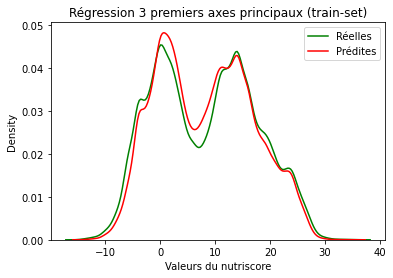

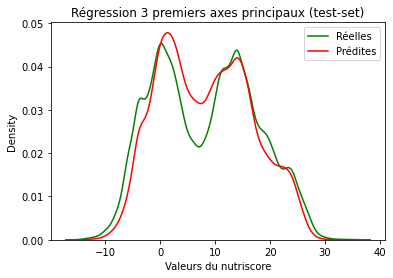

In [66]:
dist_sorties_modèle(y , model3.predict(X1), 'Régression 3 premiers axes principaux (train-set)')
dist_sorties_modèle(y_test , model3.predict(X1_test), 'Régression 3 premiers axes principaux (test-set)')

### Observations:

- Bon R² pour l'entrainement moins bon pour les valeurs test.

- Précision moyenne +- 4

- les décalages entre les distributions du train-set sont accentués sur le test-set ce qui explique les différences de R²

***************************************


Construction du modèle à partir des variables projetées sur les 7 premiers axes principaux

In [67]:
from sklearn.ensemble import RandomForestRegressor  

# définition des paramatres du regressor random forest
model4=RandomForestRegressor(n_jobs=-1,random_state=42)
    
# fit
model4.fit(X2, y)
    
# Importance des variables
print('Importance de Gini (Mean Decrease in Impurity) des estimateurs : ')
print(model4.feature_importances_)   

# Métriques pour évaluer la qualité du modèle    
# score
score_train=model4.score(X2, y)
print ('\n\nTrain : R²= ',score_train)
score_test=model4.score(X2_test, y_test)
print ('\nTest  : R²= ',score_test,'\n')
# racine de la moyenne des carrés des résidus
print('RMSE= ', np.sqrt( np.mean((model4.predict(X2_test) - y_test) ** 2)))

Importance de Gini (Mean Decrease in Impurity) des estimateurs : 
[0.42539842 0.0323086  0.02259799 0.25298584 0.05761186 0.06929369
 0.13980359]


Train : R²=  0.9911474879098026

Test  : R²=  0.95608933575083 

RMSE=  1.9046183396708296


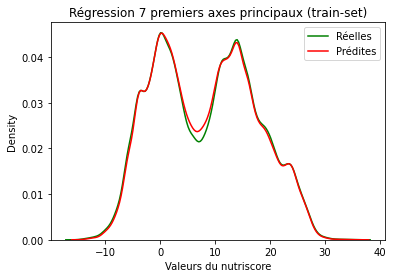

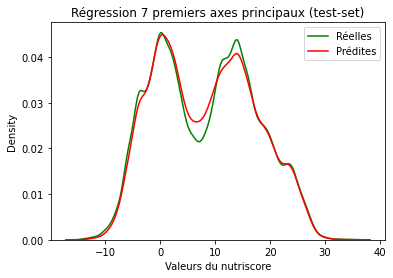

In [68]:
dist_sorties_modèle(y , model4.predict(X2), 'Régression 7 premiers axes principaux (train-set)')
dist_sorties_modèle(y_test , model4.predict(X2_test), 'Régression 7 premiers axes principaux (test-set)')

### Observations:

- meilleur résultat sur le test avec une précision à +-1,9 du nutriscore

- certaines features semblent avoir une importance moindre, réessai en ne les selectionnant pas.

*************************************************
Création de train_set et Test_set à partir de F_0 , F_3 , F_5 et F_6 les features les plus importantes pour le modèle précédent

In [69]:
# Affectation à X3 des features F0, F3, F5, F6
X3=Train_proj[['F_0','F_3','F_5','F_6']].values
# Affextation à X3_test des mêmes features
X3_test=X_test[:,[0,3,5,6]]

In [70]:
from sklearn.ensemble import RandomForestRegressor  

# définition des paramatres du regressor random forest
model4=RandomForestRegressor(n_jobs=-1,random_state=42)
    
# fit
model4.fit(X3, y)
    
# Importance des variables
print('Importance de Gini (Mean Decrease in Impurity) des estimateurs : ')
print(model4.feature_importances_)   

# Métriques pour évaluer la qualité du modèle    
# score
score_train=model4.score(X3, y)
print ('\n\nTrain : R²= ',score_train)
score_test=model4.score(X3_test, y_test)
print ('\nTest  : R²= ',score_test,'\n')
# racine de la moyenne des carrés des résidus
print('RMSE= ', np.sqrt( np.mean((model4.predict(X3_test) - y_test) ** 2)))


Importance de Gini (Mean Decrease in Impurity) des estimateurs : 
[0.43565613 0.26820379 0.13769984 0.15844024]


Train : R²=  0.9892772542694727

Test  : R²=  0.9429012838158464 

RMSE=  2.1718815210725673


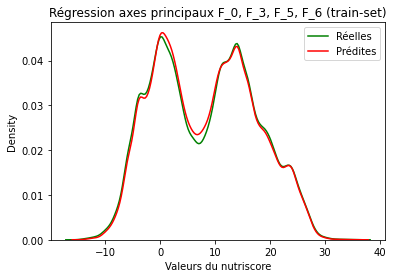

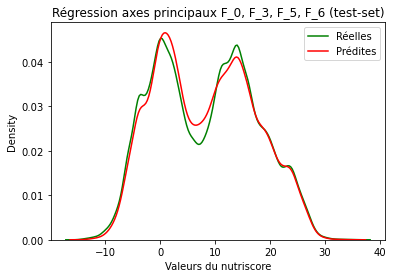

In [71]:
dist_sorties_modèle(y , model4.predict(X3), 'Régression axes principaux F_0, F_3, F_5, F_6 (train-set)')
dist_sorties_modèle(y_test , model4.predict(X3_test), 'Régression axes principaux F_0, F_3, F_5, F_6 (test-set)')

### Observations:

- indicateurs en baisse tant pour le score de bonnes réponses sur le test que pour la précision.

- Au vu du faible nombre de variables et de la rapidité d'apprentissage du modèle la réduction du nombre de features ne semble pas apropriée.


***************************************************
### Conclusion

Le concept d'application :

- prédire le nutriscore à l'aide d'une régression :
    -  en fonction de seulement 7 variables et sans connaître la nature du produit
    -  en ne retenant que 4 axes principaux
    -  R² supérieur à 94%

Le concept semble être valide. 

### Pistes à explorer pour pouvoir exploiter le concept:
   - Vérifier plus en détail la coincidence des prédictions : ici seules les distributions sont semblables. Les divergences entre score réel et score prédit n'ont pas été étudiées en détail. 
        
   - Améliorer la précision en étudiant les effets des outliers sur la qualité des predictions du modèle.
    
   - Régler les paramètres du modèle pour optimiser la qualité des prédictions.
        
   - Voir comment arrondir les valeurs du score prédites à l'unité, pour pouvoir réellement affecter un score entier aux produits pour lesquels l'application va être utilisée. 
        
   - Changer légèrement le concept d'application en donnant le classement de l’aliment dans l’échelle nutritionnelle à cinq couleurs sur la base du score calculé afin de minimiser les erreurs de prédiction.